In [32]:
import pandas as pd

try:
    df = pd.read_csv('../data/data.txt', delimiter='|')
except:
      df = pd.read_csv('../data/data.txt', delimiter='|')
df.to_csv('../data/data.csv', index=False)
print(df.head())


C:\Users\user\AppData\Local\Temp\ipykernel_7504\1047915863.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/data.txt', delimiter='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [1]:
import pandas as pd

df = pd.read_csv('../data/data.csv')


C:\Users\user\AppData\Local\Temp\ipykernel_4716\2763805539.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/data.csv')


In [2]:
print(df.shape)

(1000098, 52)


In [3]:
missing = df.isnull().sum()
print(missing[missing > 0])



Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [4]:
print(f"Dataset shape: {df.shape}")  # (rows, columns)

print("\nData types:")
print(df.dtypes)

Dataset shape: (1000098, 52)

Data types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype              

In [6]:
# Check missing values per column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Display columns with missing values (sorted)
missing_report = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percentage
}).sort_values(by='Missing %', ascending=False)

print(missing_report[missing_report['Missing Count'] > 0])

                         Missing Count   Missing %
NumberOfVehiclesInFleet        1000098  100.000000
CrossBorder                     999400   99.930207
CustomValueEstimate             779642   77.956560
Rebuilt                         641901   64.183810
Converted                       641901   64.183810
WrittenOff                      641901   64.183810
NewVehicle                      153295   15.327998
Bank                            145961   14.594670
AccountType                      40232    4.022806
Gender                            9536    0.953507
MaritalStatus                     8259    0.825819
VehicleType                        552    0.055195
make                               552    0.055195
mmcode                             552    0.055195
Model                              552    0.055195
Cylinders                          552    0.055195
bodytype                           552    0.055195
kilowatts                          552    0.055195
NumberOfDoors                  

<Axes: >

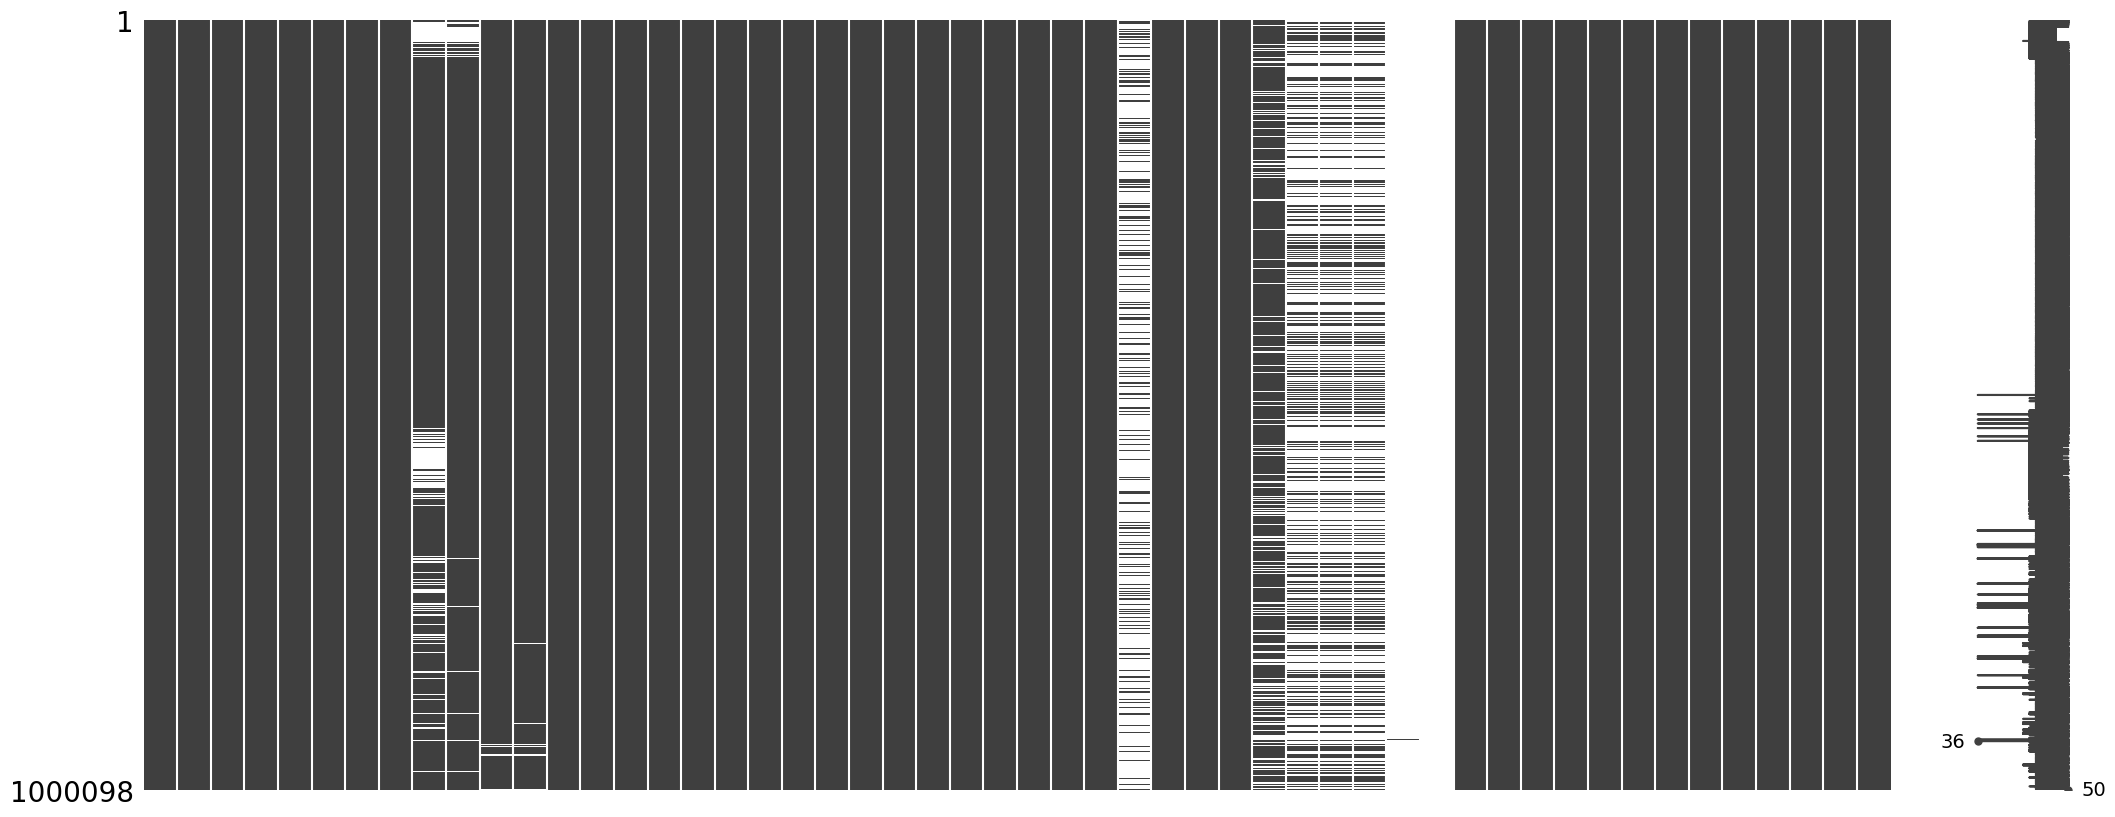

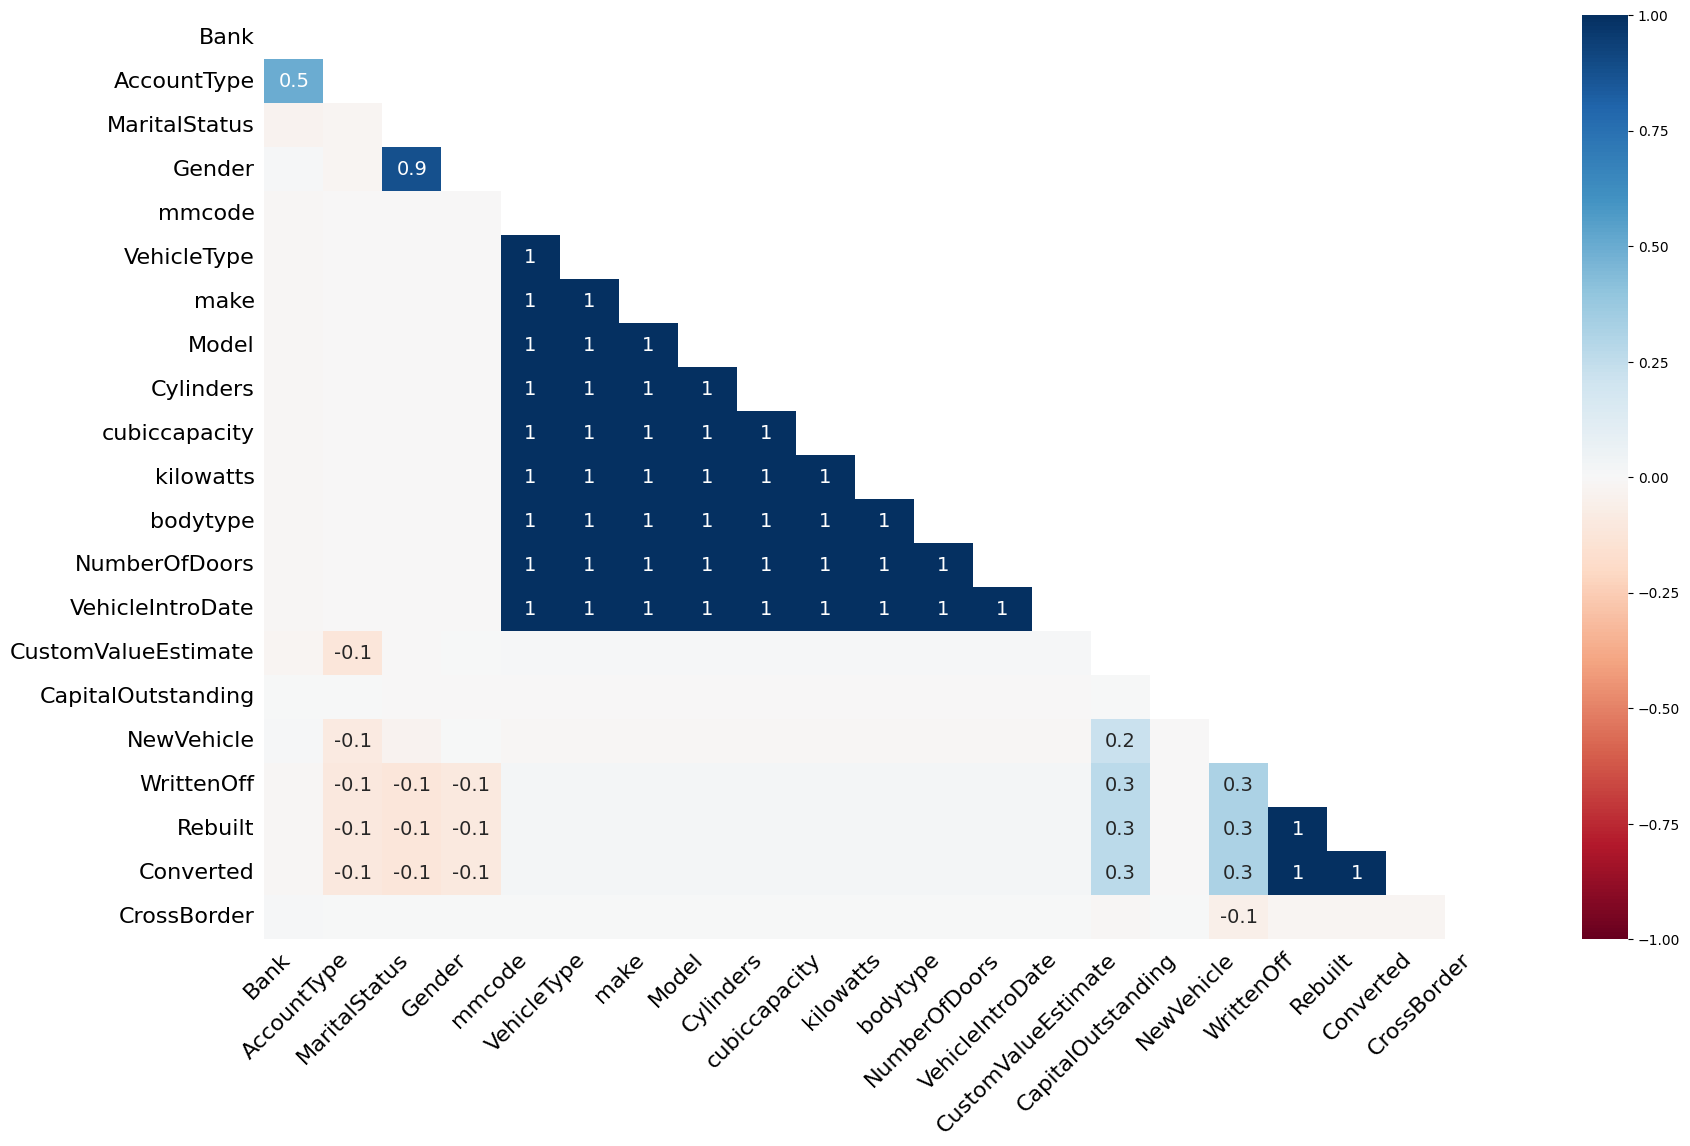

In [9]:
import missingno as msno

msno.matrix(df)
msno.heatmap(df)


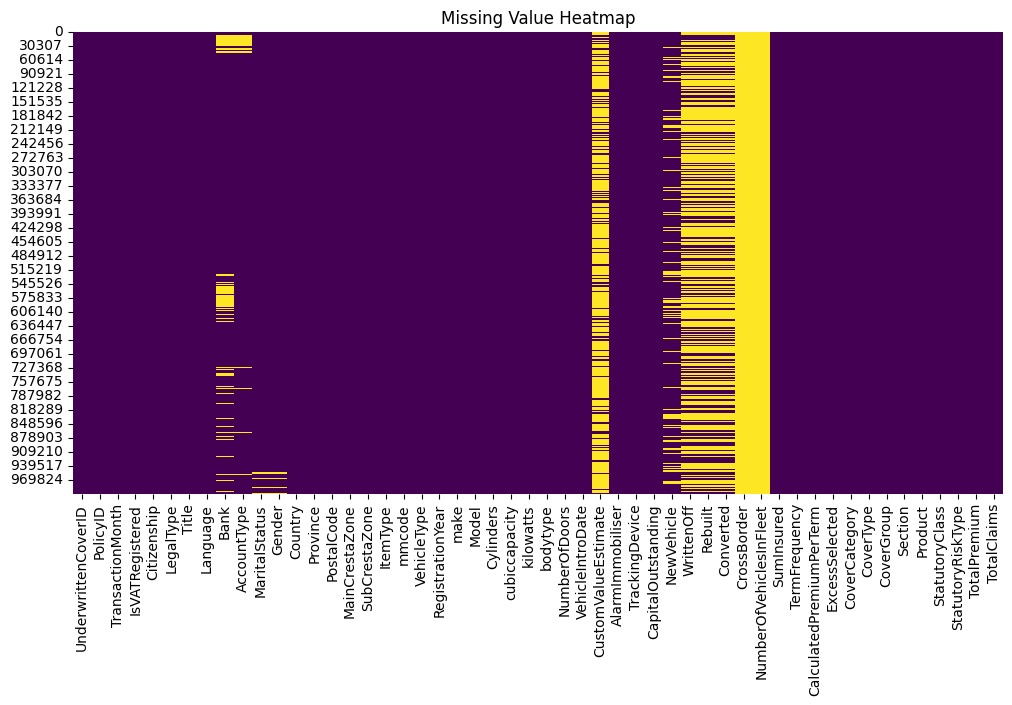

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missingness
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


In [12]:
# Check missing values, percentage, and data types per column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
data_types = df.dtypes

# Create a comprehensive report
missing_report = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percentage,
    'Data Type': data_types
}).sort_values(by='Missing %', ascending=False)

# Filter to show only columns with missing values
missing_report = missing_report[missing_report['Missing Count'] > 0]

print(missing_report)

                         Missing Count   Missing % Data Type
NumberOfVehiclesInFleet        1000098  100.000000   float64
CrossBorder                     999400   99.930207    object
CustomValueEstimate             779642   77.956560   float64
Rebuilt                         641901   64.183810    object
Converted                       641901   64.183810    object
WrittenOff                      641901   64.183810    object
NewVehicle                      153295   15.327998    object
Bank                            145961   14.594670    object
AccountType                      40232    4.022806    object
Gender                            9536    0.953507    object
MaritalStatus                     8259    0.825819    object
VehicleType                        552    0.055195    object
make                               552    0.055195    object
mmcode                             552    0.055195   float64
Model                              552    0.055195    object
Cylinders               

In [13]:
# Drop the three columns from the DataFrame
df.drop(['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate'], axis=1, inplace=True)


In [17]:

# Show remaining columns with missing values and data types
missing_summary = df.isnull().sum().to_frame(name='MissingCount')
missing_summary['MissingPercent'] = (missing_summary['MissingCount'] / len(df)) * 100
missing_summary['DataType'] = df.dtypes

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['MissingCount'] > 0]

# Display result
print(missing_summary.sort_values(by='MissingPercent', ascending=False))

                    MissingCount  MissingPercent DataType
Rebuilt                   641901       64.183810   object
WrittenOff                641901       64.183810   object
Converted                 641901       64.183810   object
NewVehicle                153295       15.327998   object
Bank                      145961       14.594670   object
AccountType                40232        4.022806   object
Gender                      9536        0.953507   object
MaritalStatus               8259        0.825819   object
mmcode                       552        0.055195  float64
VehicleType                  552        0.055195   object
make                         552        0.055195   object
kilowatts                    552        0.055195  float64
cubiccapacity                552        0.055195  float64
Cylinders                    552        0.055195  float64
Model                        552        0.055195   object
NumberOfDoors                552        0.055195  float64
VehicleIntroDa

In [18]:
# 1. Handle object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)  # or use 'Unknown' if preferred
        # df[col].fillna('Unknown', inplace=True)

# 2. Handle float (numerical) columns
float_cols = df.select_dtypes(include='float64').columns

for col in float_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# 3. Convert 'CapitalOutstanding' to float and impute
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')  # convert object to float
df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].median(), inplace=True)

# 4. Verify that no missing values remain
print(df.isnull().sum().sort_values(ascending=False).head())

C:\Users\user\AppData\Local\Temp\ipykernel_4716\2866508187.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # or use 'Unknown' if preferred
C:\Users\user\AppData\Local\Temp\ipykernel_4716\2866508187.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

UnderwrittenCoverID    0
PolicyID               0
TransactionMonth       0
IsVATRegistered        0
Citizenship            0
dtype: int64


In [19]:

# Show remaining columns with missing values and data types
missing_summary = df.isnull().sum().to_frame(name='MissingCount')
missing_summary['MissingPercent'] = (missing_summary['MissingCount'] / len(df)) * 100
missing_summary['DataType'] = df.dtypes

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['MissingCount'] > 0]

# Display result
print(missing_summary.sort_values(by='MissingPercent', ascending=False))

Empty DataFrame
Columns: [MissingCount, MissingPercent, DataType]
Index: []


In [20]:
# 4. Save cleaned data to CSV
df.to_csv('../data/cleaned.csv', index=False)

print("Data cleaned and saved to cleaned.csv")

Data cleaned and saved to cleaned.csv


In [21]:
print(df.isnull().sum())


UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
WrittenOff

In [22]:
has_duplicates = df.duplicated().any()
print("Duplicates exist?" , has_duplicates)


Duplicates exist? True


In [24]:
# see duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 74


In [25]:
# remove the duplicate rows
df = df.drop_duplicates()


In [29]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [27]:
df.to_csv('../data/cleaned1.csv', index=False)

print("Data cleaned and saved to cleaned.csv")

Data cleaned and saved to cleaned.csv


In [2]:
import pandas as pd

df1 = pd.read_csv('../data/cleaned1.csv')

In [8]:
# Show remaining columns with missing values and data types
missing_summary = df1.isnull().sum().to_frame(name='MissingCount')
missing_summary['MissingPercent'] = (missing_summary['MissingCount'] / len(df1)) * 100
missing_summary['DataType'] = df1.dtypes

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['MissingCount'] > 0]

# Display result
print(missing_summary.sort_values(by='MissingPercent', ascending=False))

Empty DataFrame
Columns: [MissingCount, MissingPercent, DataType]
Index: []


In [9]:
num_duplicates = df1.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [14]:
#list numeric columns
numerical_cols = df1.select_dtypes(include='number').columns.tolist()
print(numerical_cols)

df1[numerical_cols].describe().T



['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CapitalOutstanding', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000024.0,1.048156e+05,6.329558e+04,1.000000e+00,5.514100e+04,9.408000e+04,1.391910e+05,3.011750e+05
PolicyID,1000024.0,7.956455e+03,5.290155e+03,1.400000e+01,4.500000e+03,7.071000e+03,1.107700e+04,2.324600e+04
PostalCode,1000024.0,3.020286e+03,2.649677e+03,1.000000e+00,8.270000e+02,2.000000e+03,4.180000e+03,9.870000e+03
mmcode,1000024.0,5.488018e+07,1.360103e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000024.0,2.010226e+03,3.261314e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,1000024.0,4.046620e+00,2.939516e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,1000024.0,2.466852e+03,4.427227e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,1000024.0,9.721451e+01,1.939096e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,1000024.0,4.019241e+00,4.682027e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CapitalOutstanding,1000024.0,5.259218e+04,1.114065e+05,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+05


In [15]:
for col in numerical_cols:
    iqr = df1[col].quantile(0.75) - df1[col].quantile(0.25)
    upper = df1[col].quantile(0.75) + 1.5 * iqr
    lower = df1[col].quantile(0.25) - 1.5 * iqr
    outliers = df1[(df1[col] < lower) | (df1[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


UnderwrittenCoverID: 5711 outliers
PolicyID: 31232 outliers
PostalCode: 8149 outliers
mmcode: 241512 outliers
RegistrationYear: 7482 outliers
Cylinders: 34262 outliers
cubiccapacity: 56939 outliers
kilowatts: 2175 outliers
NumberOfDoors: 106708 outliers
CapitalOutstanding: 206996 outliers
SumInsured: 104287 outliers
CalculatedPremiumPerTerm: 175501 outliers
TotalPremium: 209042 outliers
TotalClaims: 2793 outliers


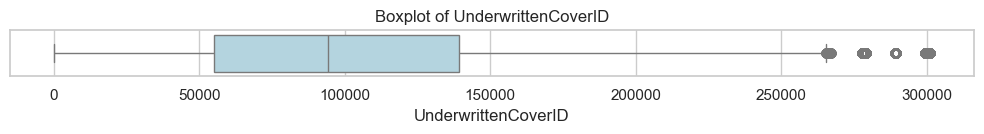

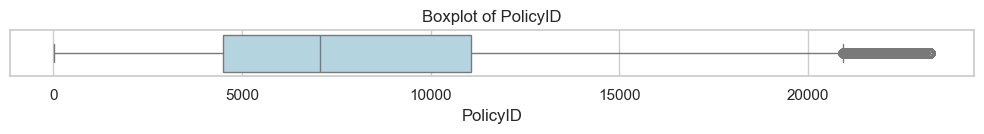

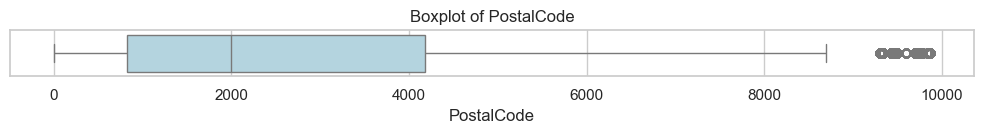

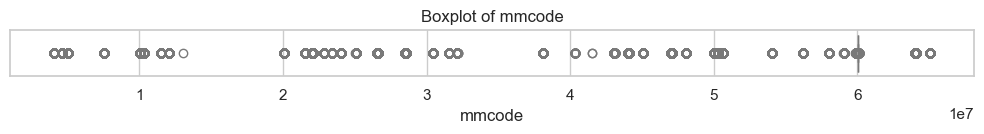

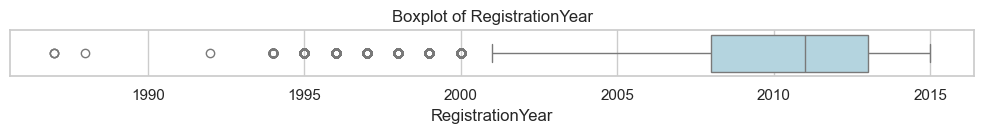

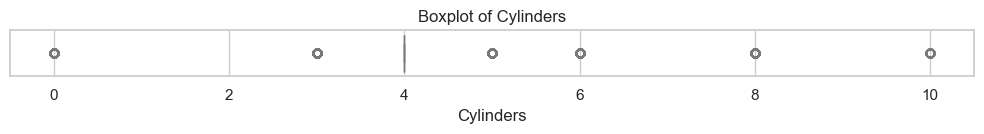

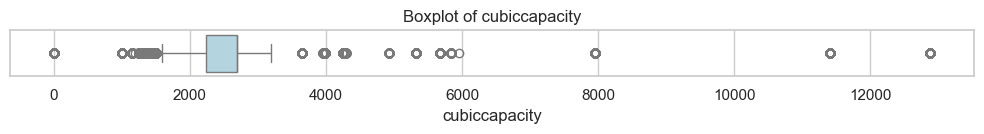

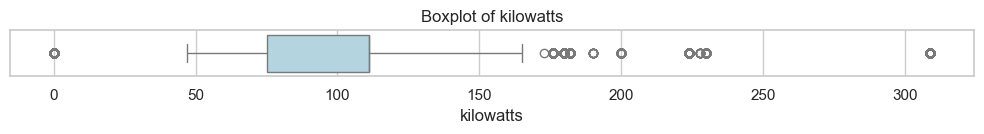

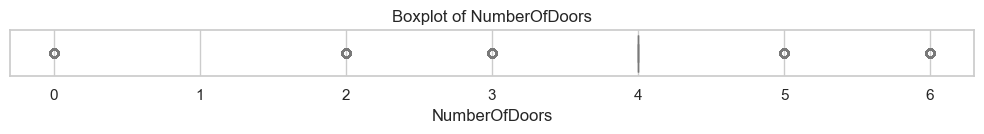

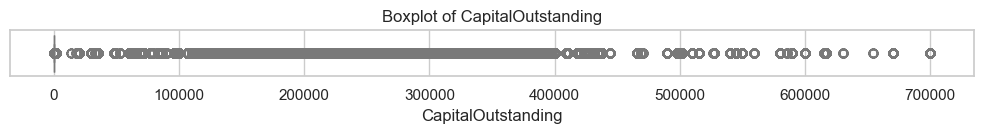

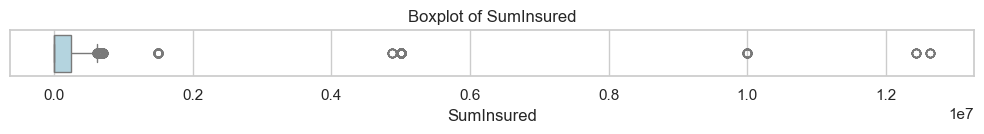

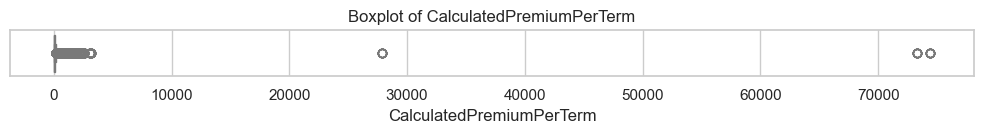

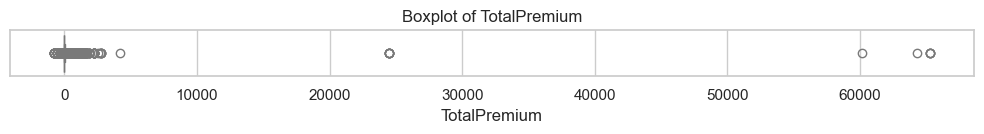

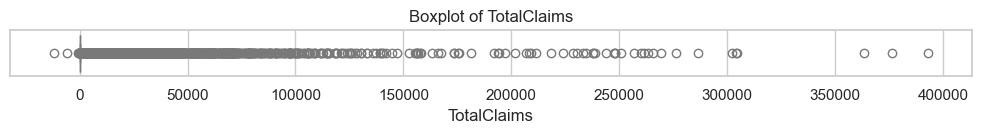

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns with many outliers (based on your report)
outlier_cols = [
    'UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear',
    'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CapitalOutstanding',
    'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'
]

# Plot boxplots
for col in outlier_cols:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df1[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


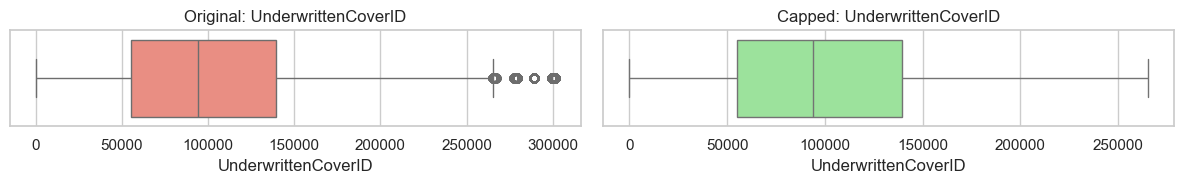

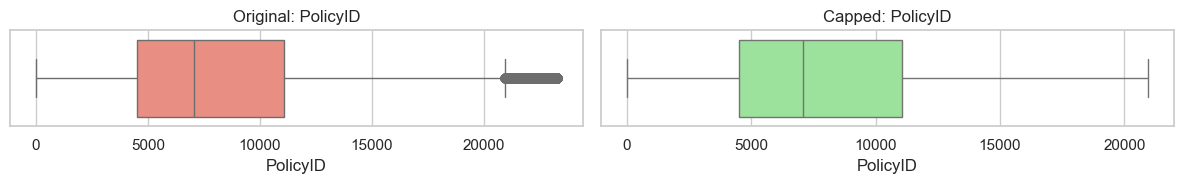

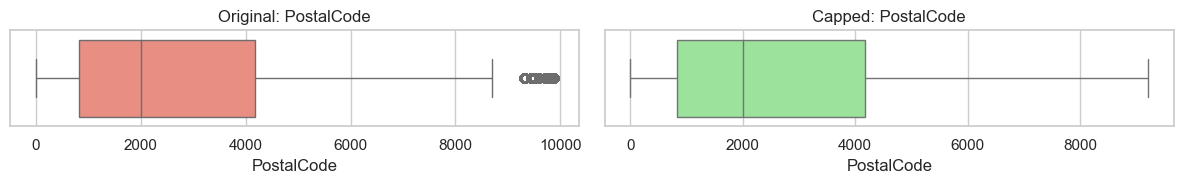

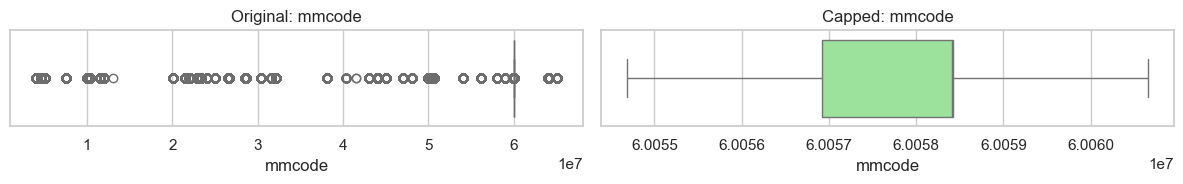

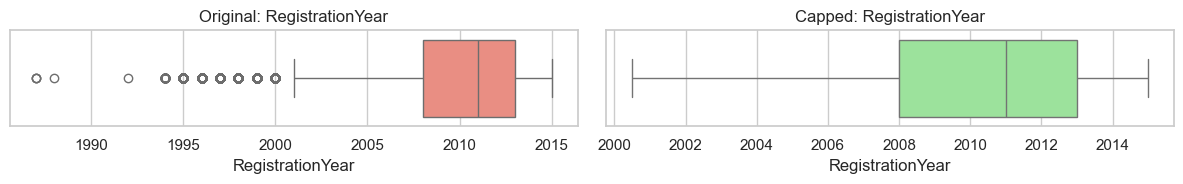

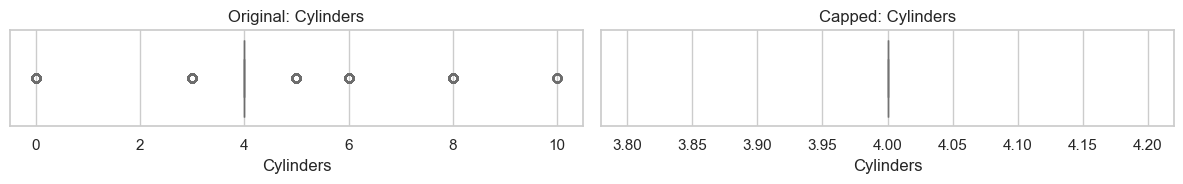

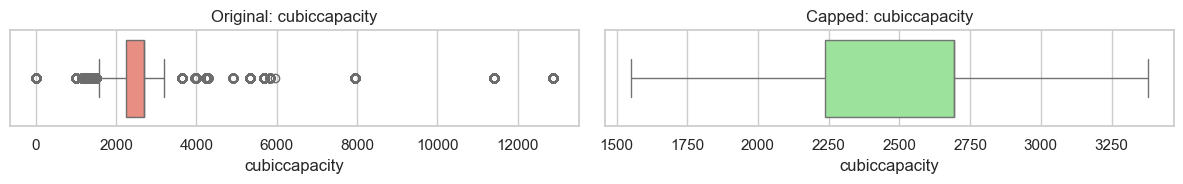

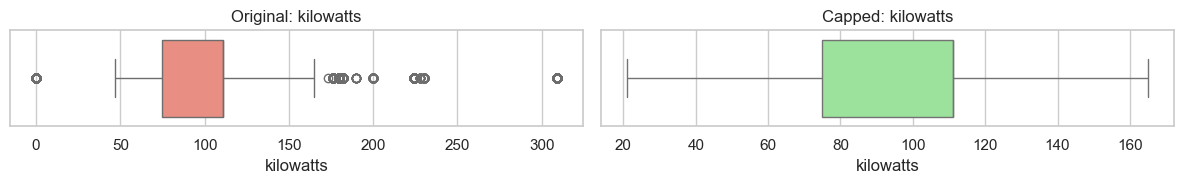

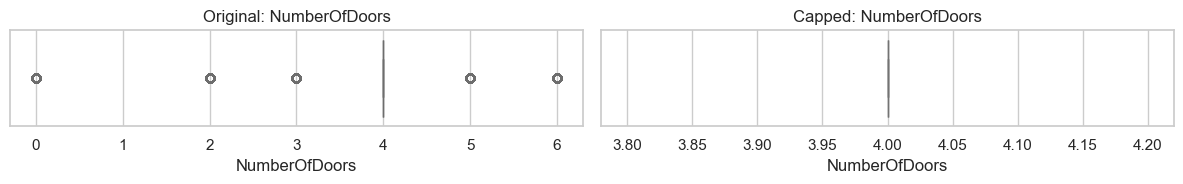

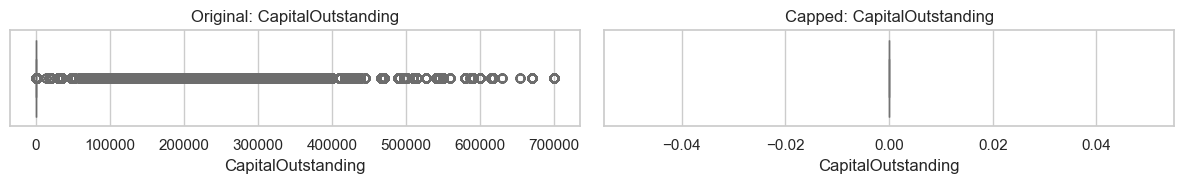

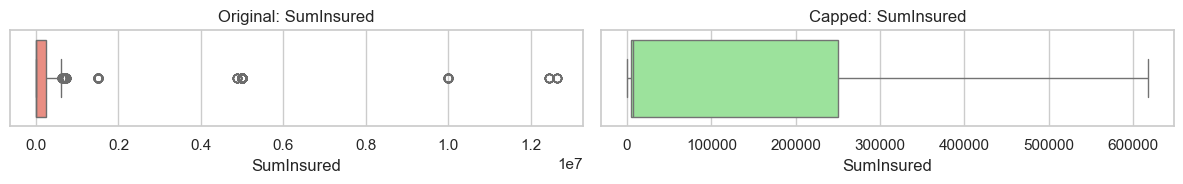

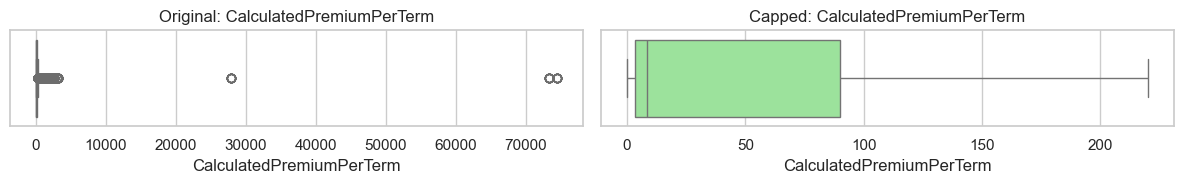

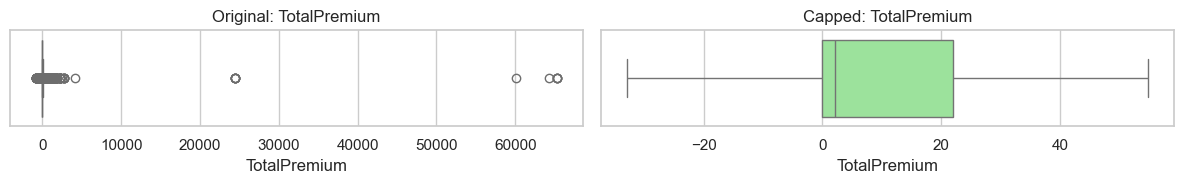

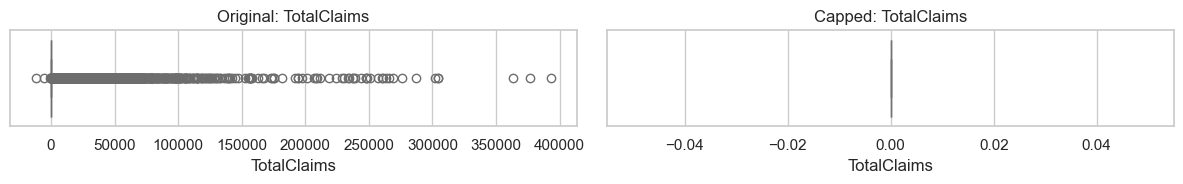

In [30]:

# outlier detection and fixing using capping (Winsorization)
# List of columns with outliers to fix
outlier_cols = [
    'UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear',
    'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CapitalOutstanding',
    'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'
]

# Function to cap outliers using IQR (Winsorization)
def cap_outliers(df1, columns):
    for col in columns:
        if col in df1.columns:
            Q1 = df1[col].quantile(0.25)
            Q3 = df1[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df1[col] = df1[col].clip(lower=lower, upper=upper)

    return df1
df_capped = cap_outliers(df1.copy(), outlier_cols)

# Boxplot before and after capping (side by side)
for col in outlier_cols:
    if col in df1.columns:
        plt.figure(figsize=(12, 2))
        
        # Original
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df1[col], color='salmon')
        plt.title(f'Original: {col}')

        # After capping
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_capped[col], color='lightgreen')
        plt.title(f'Capped: {col}')
        
        plt.tight_layout()
        plt.show()



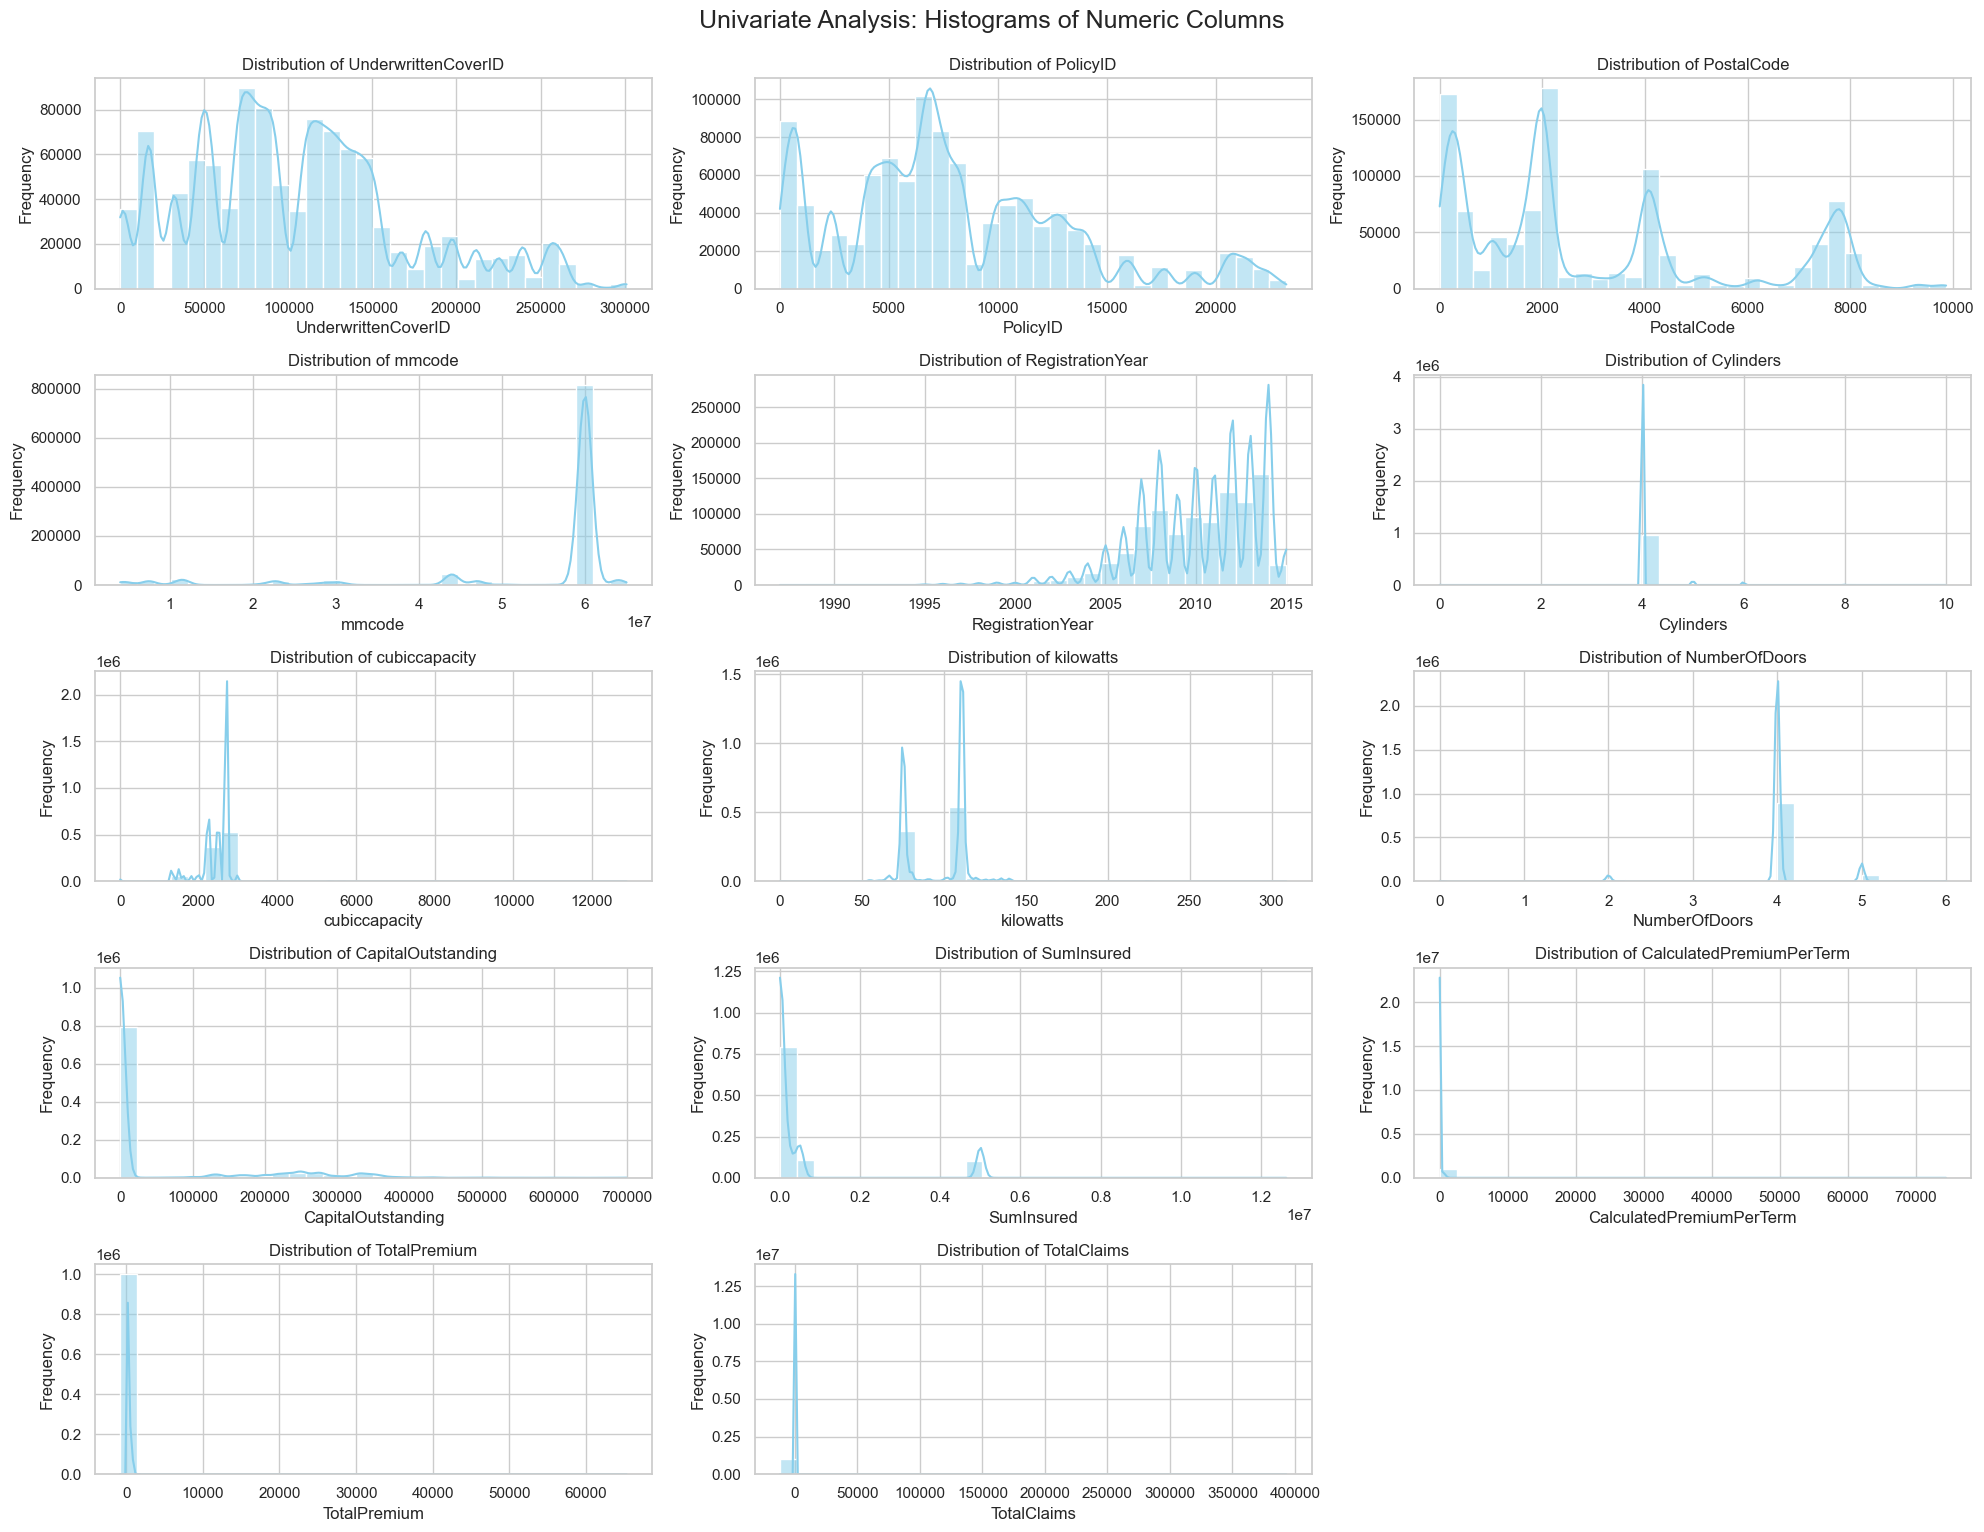

In [31]:
#Steps to Plot Histograms for All Numerical Columns
#Univariate Analysis: Histograms of Numeric Columns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select numerical columns
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Set plot style
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.histplot(df1[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Univariate Analysis: Histograms of Numeric Columns', fontsize=18, y=1.02)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_19240\1129250234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, order=df1[col].value_counts().index, palette='pastel')


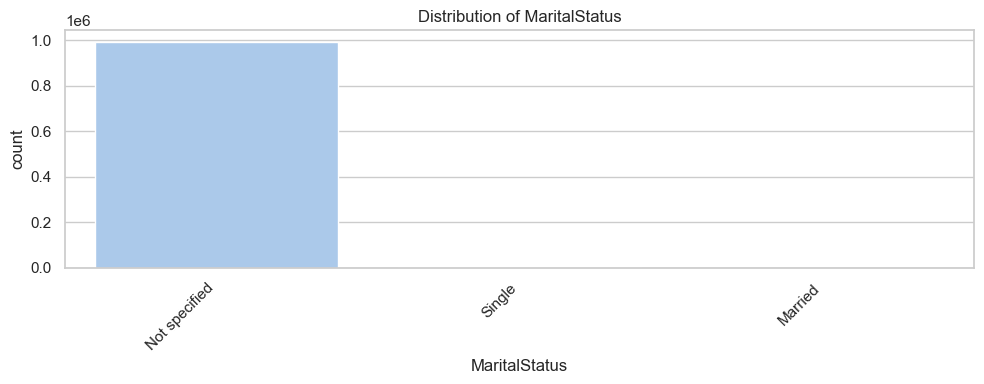

C:\Users\user\AppData\Local\Temp\ipykernel_19240\1129250234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, order=df1[col].value_counts().index, palette='pastel')


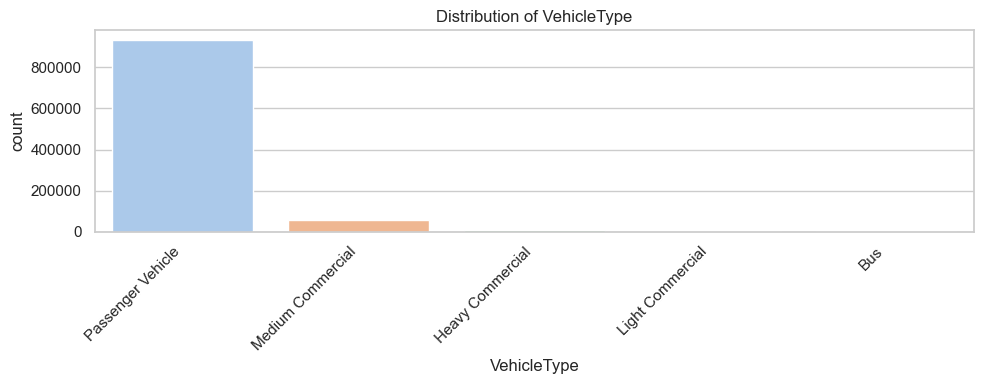

C:\Users\user\AppData\Local\Temp\ipykernel_19240\1129250234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, order=df1[col].value_counts().index, palette='pastel')


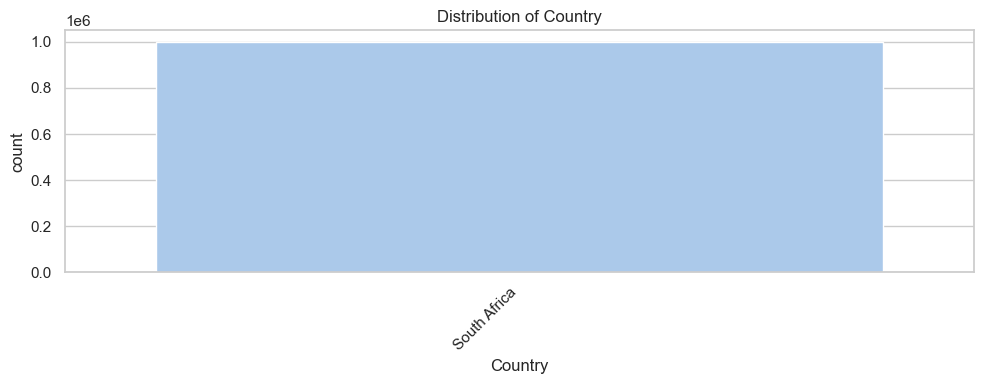

C:\Users\user\AppData\Local\Temp\ipykernel_19240\1129250234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, order=df1[col].value_counts().index, palette='pastel')


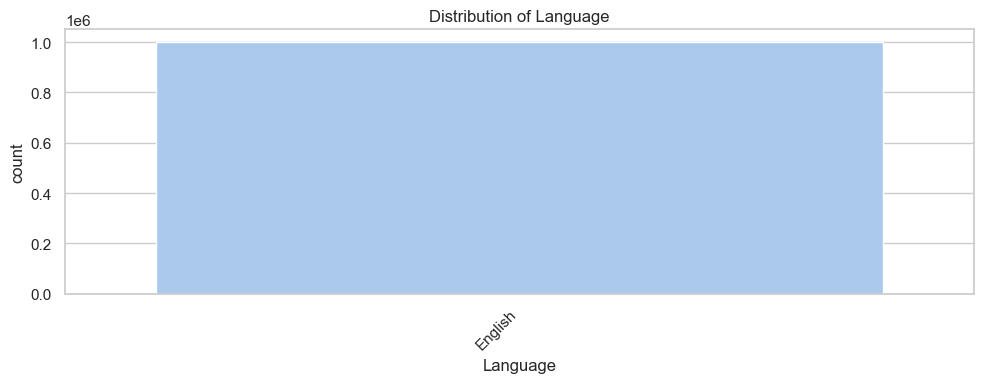

C:\Users\user\AppData\Local\Temp\ipykernel_19240\1129250234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, order=df1[col].value_counts().index, palette='pastel')


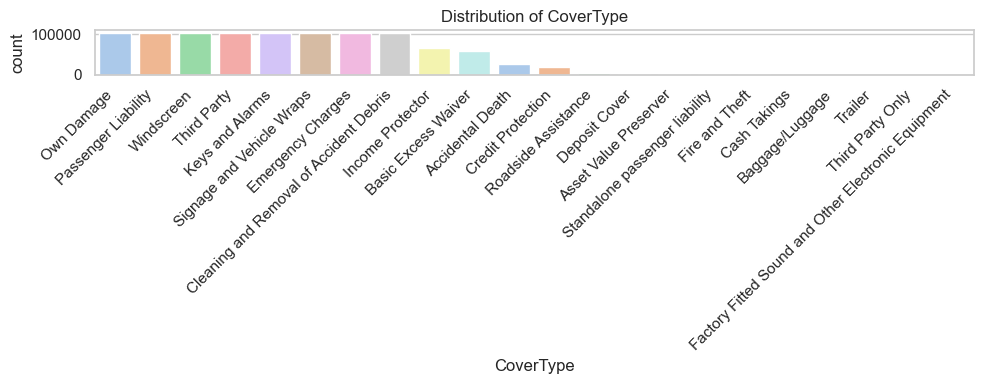

C:\Users\user\AppData\Local\Temp\ipykernel_19240\1129250234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, order=df1[col].value_counts().index, palette='pastel')


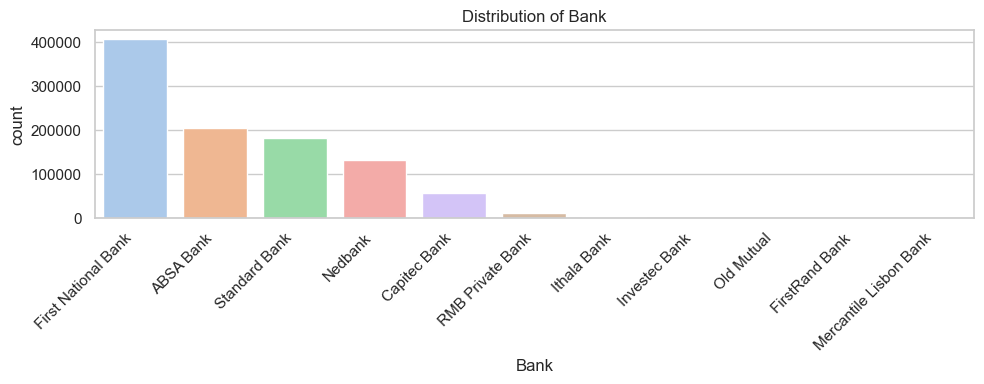

In [32]:
#Python Code Snippet to Plot Bar Charts for Categorical Columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns (adjust based on your dataset)
categorical_cols = ['MaritalStatus', 'VehicleType', 'Country', 'Language', 'CoverType', 'Bank']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df1, x=col, order=df1[col].value_counts().index, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_19240\681975816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Gender', palette='pastel')


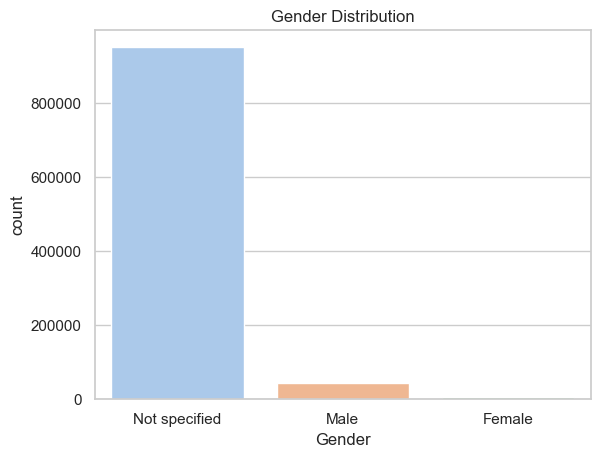

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df1, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()


In [43]:
print(df1['MaritalStatus'].value_counts(normalize=True))  # percentage
print(df1['Gender'].value_counts(normalize=True))



MaritalStatus
Not specified    0.994369
Single           0.004254
Married          0.001377
Name: proportion, dtype: float64
Gender
Not specified    0.950429
Male             0.042816
Female           0.006755
Name: proportion, dtype: float64


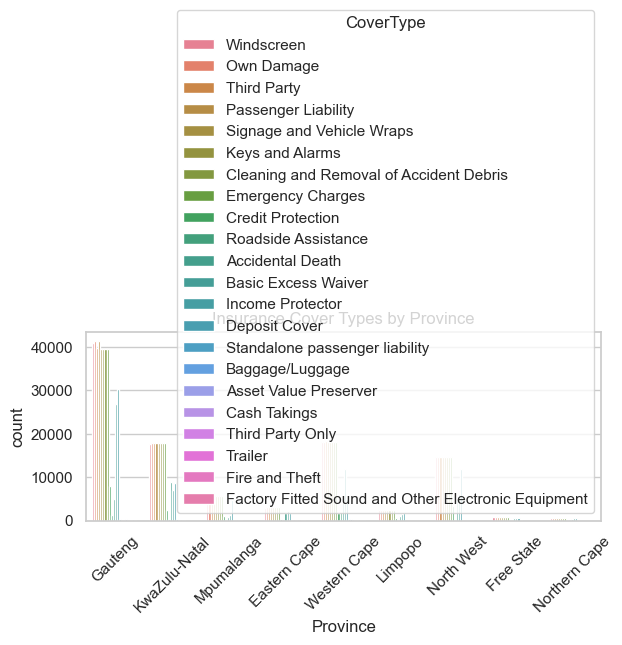

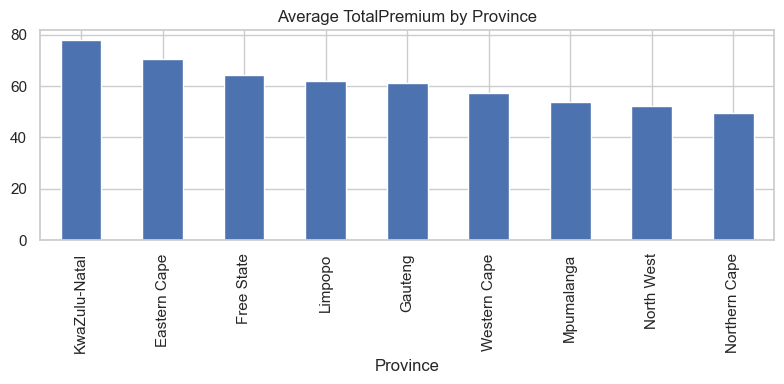

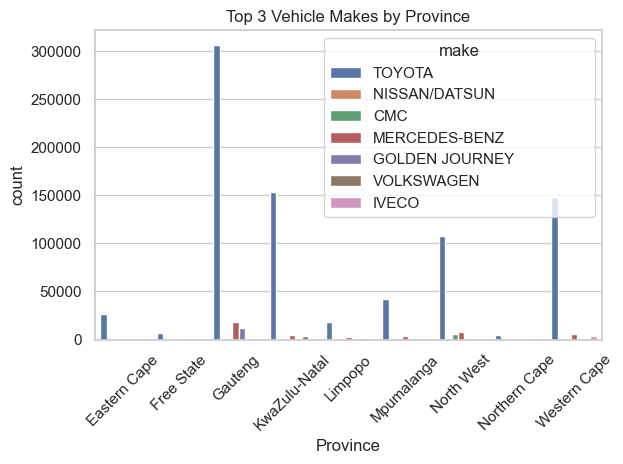

In [57]:

# 1. CoverType counts by Province
sns.countplot(data=df1, x='Province', hue='CoverType')
plt.title('Insurance Cover Types by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Average TotalPremium by Province
avg_prem = df1.groupby('Province')['TotalPremium'].mean().sort_values(ascending=False)
avg_prem.plot(kind='bar', figsize=(8,4), title='Average TotalPremium by Province')
plt.tight_layout()
plt.show()

# 3. Top 3 Vehicle Makes by Province
top_makes = (
    df1.groupby(['Province', 'make'])
    .size()
    .reset_index(name='count')
    .sort_values(['Province','count'], ascending=[True, False])
    .groupby('Province')
    .head(3)
)
sns.barplot(data=top_makes, x='Province', y='count', hue='make')
plt.title('Top 3 Vehicle Makes by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# insight i got so far 
# 1. Insurance Cover Types by Province
cover_counts = df1.groupby(['Province', 'CoverType']).size().reset_index(name='count')

# Insight 1: Which cover type is most popular per province
popular_cover_by_province = cover_counts.loc[cover_counts.groupby('Province')['count'].idxmax()]
print("Most popular Insurance Cover Type per Province:")
print(popular_cover_by_province[['Province', 'CoverType', 'count']], "\n")

# 2. Average TotalPremium by Province
avg_prem = df1.groupby('Province')['TotalPremium'].mean().sort_values(ascending=False)
print("Average Total Premium by Province:")
print(avg_prem, "\n")

# 3. Top 3 Vehicle Makes by Province
top_makes = (
    df1.groupby(['Province', 'make'])
    .size()
    .reset_index(name='count')
    .sort_values(['Province','count'], ascending=[True, False])
    .groupby('Province')
    .head(3)
)

print("Top 3 Vehicle Makes by Province:")
for province in top_makes['Province'].unique():
    makes = top_makes[top_makes['Province'] == province][['make', 'count']]
    print(f"{province}:")
    for _, row in makes.iterrows():
        print(f"  - {row['make']}: {row['count']} vehicles")
    print()

Most popular Insurance Cover Type per Province:
          Province                                CoverType  count
4     Eastern Cape  Cleaning and Removal of Accident Debris   3006
20      Free State  Cleaning and Removal of Accident Debris    787
46         Gauteng                               Own Damage  41268
71   KwaZulu-Natal                              Third Party  17747
75         Limpopo  Cleaning and Removal of Accident Debris   2494
102     Mpumalanga                              Third Party   5606
121     North West                              Third Party  14558
126  Northern Cape  Cleaning and Removal of Accident Debris    599
156   Western Cape                              Third Party  18356 

Average Total Premium by Province:
Province
KwaZulu-Natal    77.800695
Eastern Cape     70.546672
Free State       64.373780
Limpopo          61.899038
Gauteng          61.071624
Western Cape     57.440334
Mpumalanga       53.801205
North West       52.276258
Northern Cape    49.